<a href="https://colab.research.google.com/github/Utree/ml_dl_colab_memo/blob/master/2_3_5_%E6%B1%BA%E5%AE%9A%E6%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 決定木(Decision Tree: けっていぎ)
1. 木構造を用いて、分類や回帰を行う手法。
2. 木構造を作るときは、Yes/Noで答えれる２択の質問から構成する
3. 決定木には２種類のタイプがある。

  1. 分類木(Classification Tree)

  2. 回帰木(Regression Tree)

## 1. 木構造を用いて、分類や回帰を行う手法。
### 回帰
データが複数あるときに、一方を片方で説明、予測すること

### 分類
似た者同士で分けること

## 2.木構造を作るときは、Yes/Noで答えれる２択の質問から構成する


In [5]:
# git clone
!git clone https://github.com/amueller/introduction_to_ml_with_python.git
# カレントディレクトリにコピー
!cp -rf ./introduction_to_ml_with_python/* ./

Cloning into 'introduction_to_ml_with_python'...
remote: Enumerating objects: 385, done.
remote: Total 385 (delta 0), reused 0 (delta 0), pack-reused 385
Receiving objects: 100% (385/385), 156.40 MiB | 7.81 MiB/s, done.
Resolving deltas: 100% (190/190), done.


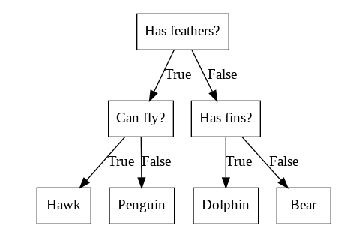

In [18]:
# ./mglearn/plots.py をインポート
from mglearn.plots import *
# 画像出力
plot_animal_tree()

## 3. 決定木には２種類のタイプがある。
### 1. 分類木
あるデータを分類するときに用いられる。

### 2. 回帰木
あるデータから数値を推定するときに用いられる。

## 決定木の構築

### 決定木をつくるプロセス
データセットを垂直に分割するとき、最も効率よく分けれるもの(テスト)を選ぶ。それを再帰的に繰り返す

### 純粋(pure)
決定木の葉のうち、１つのクラスしか含まれていないもの

pureになるまで、処理を繰り返すと、モデルがデータに対して過剰適応してしまう。これは、外れ値を重視しすぎていることから起こっていしまう

## 過剰適応を防ぐ２つの戦略
### 事前枝刈り
構築過程で木の生成を早めに止める
### 事後枝刈り
一度木を構築してから、情報量の少ないノードを削除する

**scikit-learnでは、事前枝刈りしか、実装されていない**

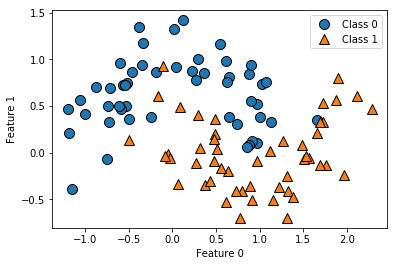

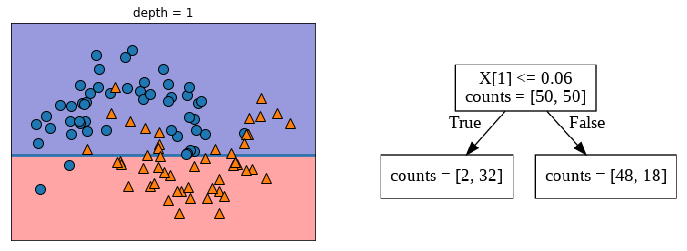

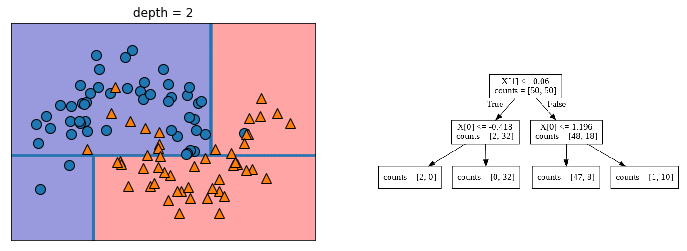

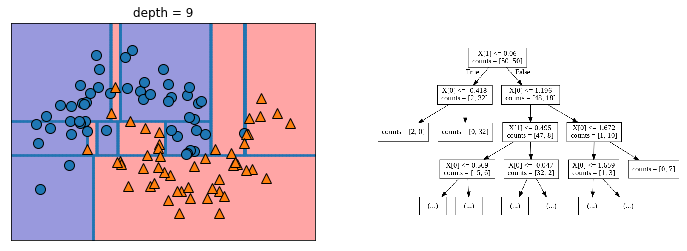

In [0]:
plot_tree_progressive()

In [0]:
!ls

01-introduction.ipynb				data
02-supervised-learning.ipynb			environment.yml
03-unsupervised-learning.ipynb			images
04-representing-data-feature-engineering.ipynb	introduction_to_ml_with_python
05-model-evaluation-and-improvement.ipynb	mglearn
06-algorithm-chains-and-pipelines.ipynb		preamble.py
07-working-with-text-data.ipynb			README.md
08-conclusion.ipynb				sample_data
cover.jpg


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# scikit-learnに入ってる乳がんのデータセット
cancer = load_breast_cancer()
# 学習と評価用データに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
# 決定木の分類モデル
tree = DecisionTreeClassifier(random_state=0)
# 学習
tree.fit(X_train, y_train)

# 評価
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [2]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


上記の結果(精度)から、事前枝刈りをすることで、汎化精度が高まっていることが分かる。

## 決定木の解析

決定目を解析(調べる)方法がある。
- 木の可視化

ビジュアライズされていてわかりやすい一方で、階層が深くなると、見づらい。

- 特徴量の重要度

各分岐ノードが

### 解析
事象を細かく分けて、組織的、論理的に調べること

### 特徴量の重要度
あるノードにおける改善度 = 分岐前の不純さ - 分岐後の不純さ

あるルートノードの重要度 = (子ノードの改善度 * サンプル数)の総和

重要度が低い　≠　そのノードがもつ情報量が少ない

In [0]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

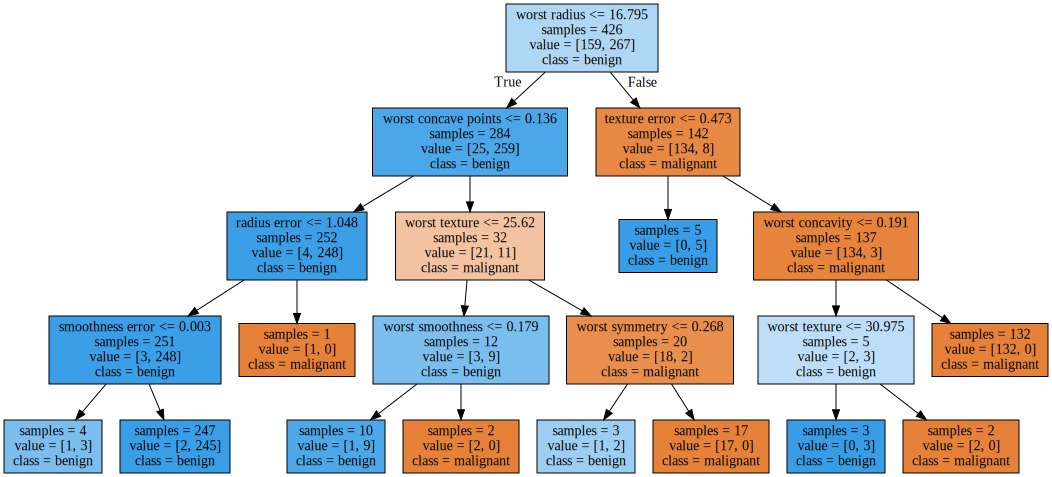

In [8]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [0]:
import matplotlib.pyplot as plt
import numpy as np

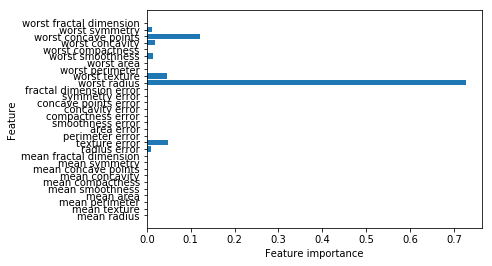

In [16]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

別の特徴量に同じ情報がエンコードされている場合があるので、特徴量の大小で一概に分類できるわけではない

In [0]:
import mglearn

Feature importances: [0. 1.]


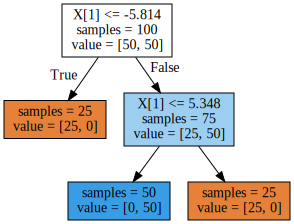

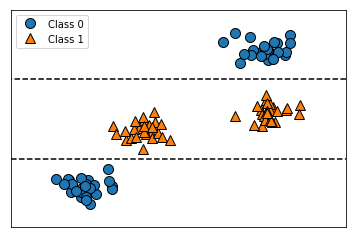

In [22]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

## 決定木の回帰モデル

計算機のメモリ価格の履歴データセット

In [0]:
import os
import pandas as pd

Text(0, 0.5, 'Price in $/MB')

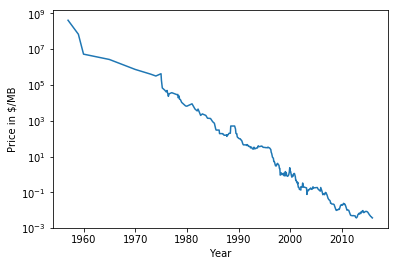

In [25]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/MB")

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 過去のデータを用いて2000年以降の価格を予想する
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 日付に基づいて価格を予想
X_train = data_train.date[:, np.newaxis]
# データとターゲットの関係を単純にするために対数変換
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# すべての価格を予想
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 対数変換をキャンセルするために逆変換
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

DecisionTreeRegressorとLinearRegressionの比較

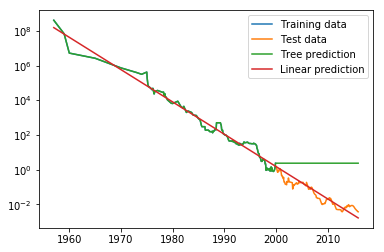

In [31]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

線形モデルでは、データを直線で近似し、予測している一方で、決定木では、訓練データに対して完全に予測しているが、データを持っていない領域になると、知っている最後の点を返す

決定木は訓練データにない領域に関して、新しい答えを生成できない

**決定機の回帰モデルでは、外挿(extrapolate)ができない**

## 決定木のアンサンブル法
**アンサンブル法**とは、複数の機械学習モデルを組み合わせることで、より強力なモデルを構築する方法

決定木のアンサンブル法として、有効であるとされているのは２つあり、
- ランダムフォレスト
- 勾配ブースティング決定木

決定木の最大の問題は、訓練データに対して、過剰適応してしまうこと

### ランダムフォレスト


ランダムフォレストは、過剰適合した決定木をたくさん作り、平均をとることで、過剰適合の度合いを減らすアプローチ

ランダムフォレストの名前の所以は決定目を作る過程で乱数を導入してるから

ランダムフォレストに乱数を導入する方法
- 決定木を作るためのデータポイントを選択する
- 分岐テストに用いる特徴(ノード?)を選択する方法

### ブートストラップサンプリング
n_samples個のデータポイントから、交換ありでデータポイントをランダムにn_samples回選び出す手法(復元抽出)

データの一部(1/3)が欠け、一部が何度か現れるデータセットを得る

ブートストラップサンプリングで、それぞれ異なる複数のデータセットをつくる



それぞれのデータセットに対して個別に決定木をつくる

決定木を作る際、個々のノードで最適なテストを選ばず、特徴量のサブセットで(一部の特徴量を)、ランダムに選び、その特徴量の中から最適なテストを選ぶ

特徴量のサブセットの大きさはmax_featureで制御しており、max_featureをへらすと、特徴量の種類が減る

極端な場合、max_featureを1にすると、ある特徴量の閾値(スレッショルド)を探すだけ

特徴量とテストの違い?

## ランダムフォレストの解析

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

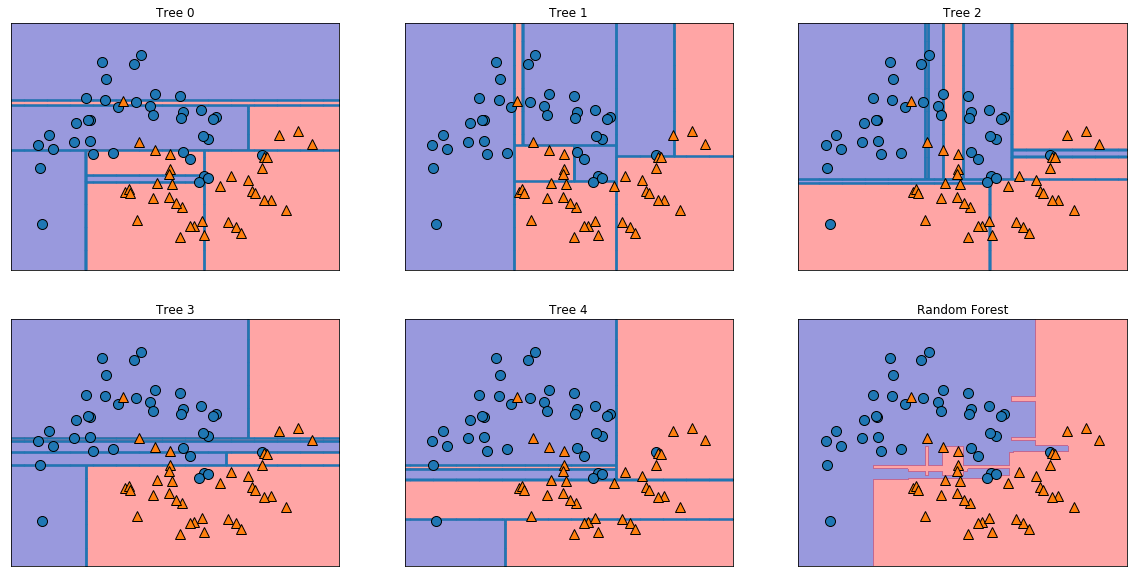

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
  
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on targeting set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on targeting set: 1.000
Accuracy on test set: 0.972


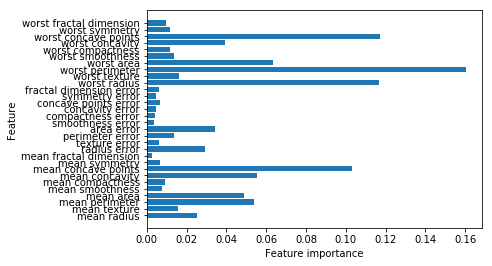

In [42]:
plot_feature_importances_cancer(forest)

### 勾配ブースティング回帰(勾配ブースティングマシン)
回帰にも、分類にも利用できる

一つ前の決定目の誤りを次の決定目が修正する

ランダムフォレストとは違い、乱数性がない?

強力な事前枝刈りが用いられる

**弱学習機(weak learner)**
浅い決定木のような、簡単なモデル

強力な事前枝刈りで、弱学習機をつくり、組み合わせることで、性能を向上させる

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000000
Accuracy on test set: 0.958


In [45]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [48]:
gbrt =  GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


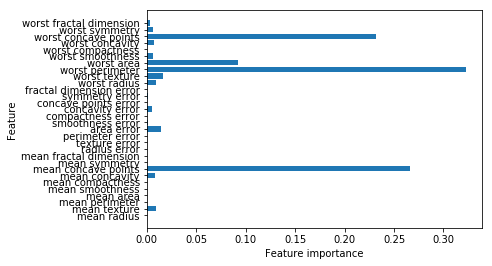

In [50]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

## 参考資料
- [具体例で学ぶ数学](https://mathwords.net/ketteigi#i-3)
- [Qiita](https://qiita.com/3000manJPY/items/ef7495960f472ec14377)
- [Wikipedia](https://ja.wikipedia.org/wiki/%E6%B1%BA%E5%AE%9A%E6%9C%A8)